In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import math

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Preprocesado y modelado
# -----------------------------------------------------------------------


# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler# para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 
from category_encoders import TargetEncoder
# Sacar número de clusters y métricas
# -----------------------------------------------------------------------
# pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Modelos de clustering
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

# Para visualizar los dendrogramas
# -----------------------------------------------------------------------
import scipy.cluster.hierarchy as sch
# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append("../../../")
import src.soporte_clustering as sc


In [2]:
df = pd.read_pickle("../../../datos/01_clustering/03_datos_estandarizados.pkl")

In [3]:
df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Product ID,,,,,,,,,,,,
FUR-FU-10000666,-1.137008,-1.548832,3.34,-0.481116,-1.01254,-0.076078,0.706355,0.0,1.35,-0.251043,-0.008242,0.0


# Modelo Kmeans

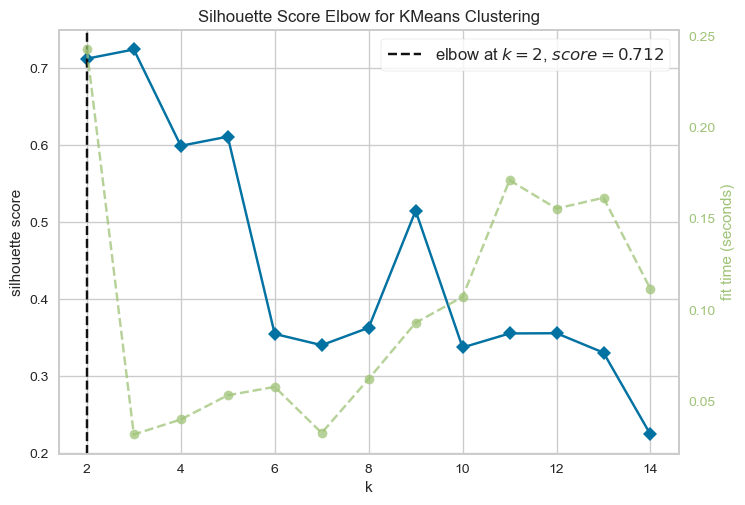

In [4]:
kmeans = sc.Clustering(df)
kmeans.sacar_clusters_kmeans()

# Dividir en 2 Grupos

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.712361,0.424106,10000
1,0.712361,0.424106,41290


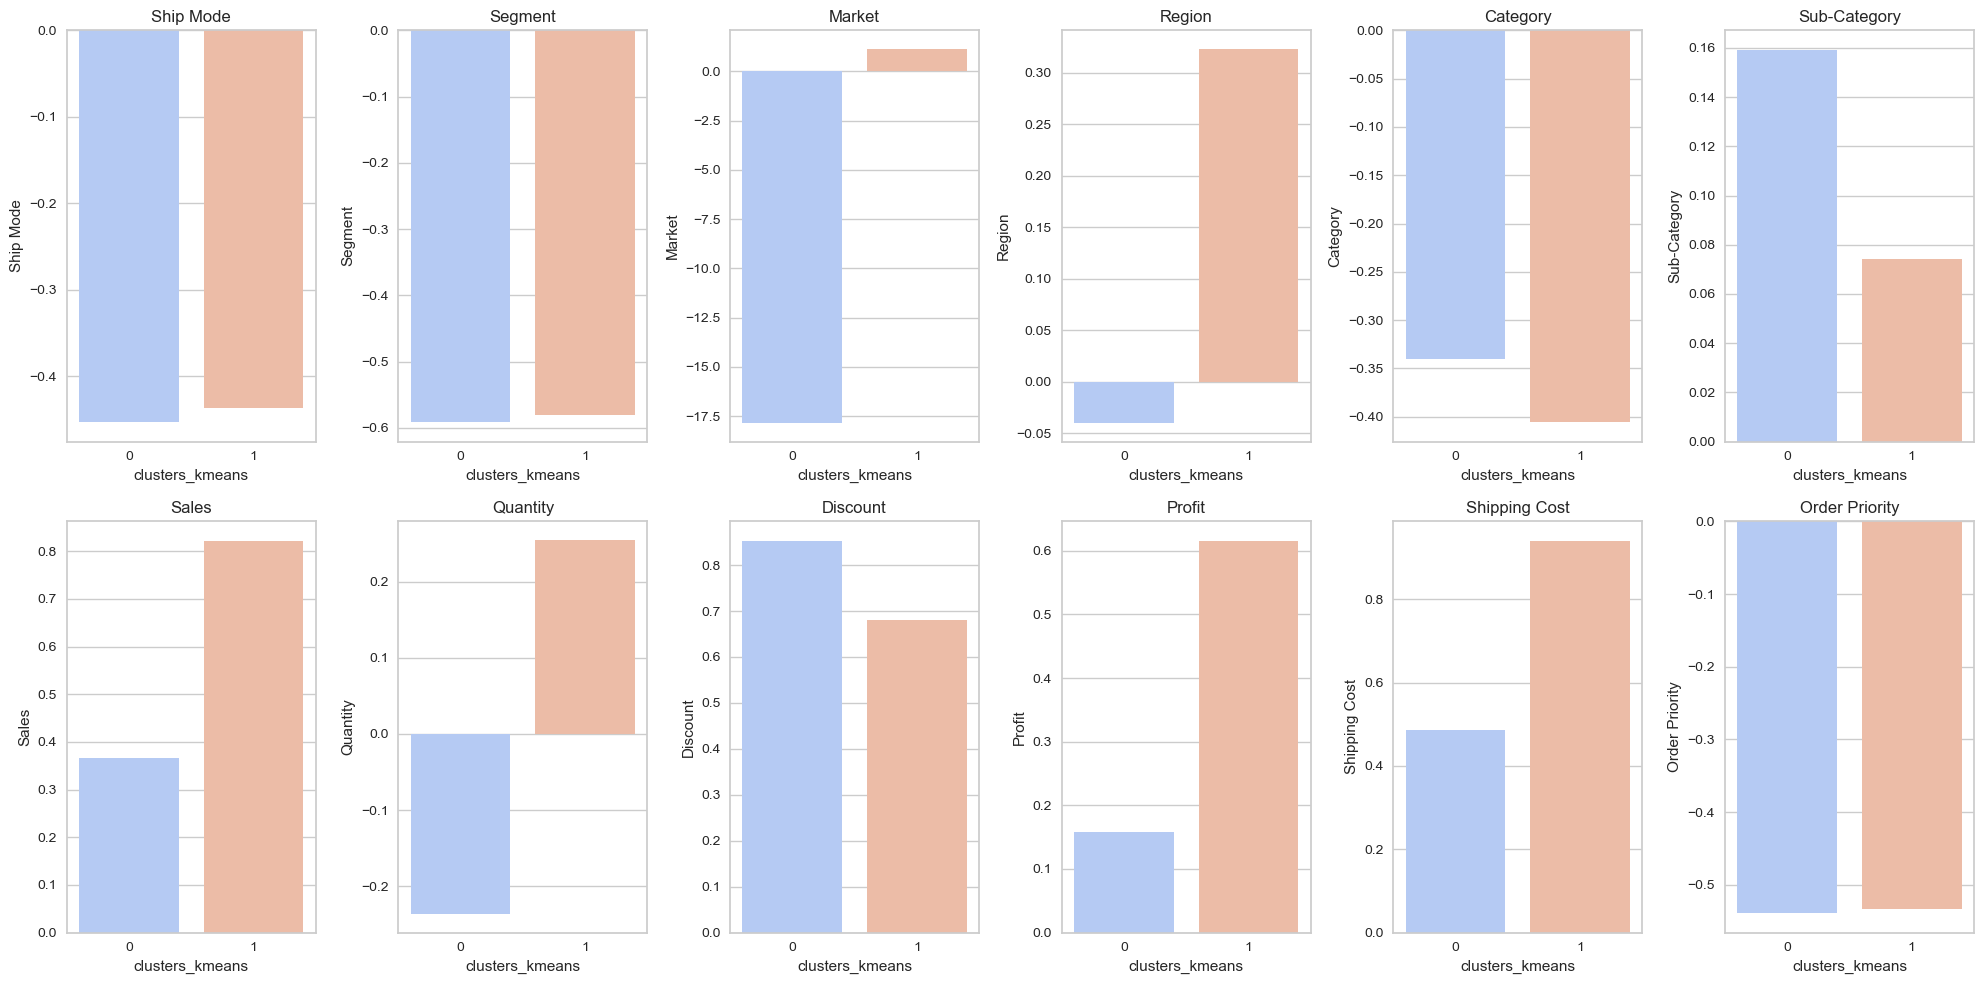

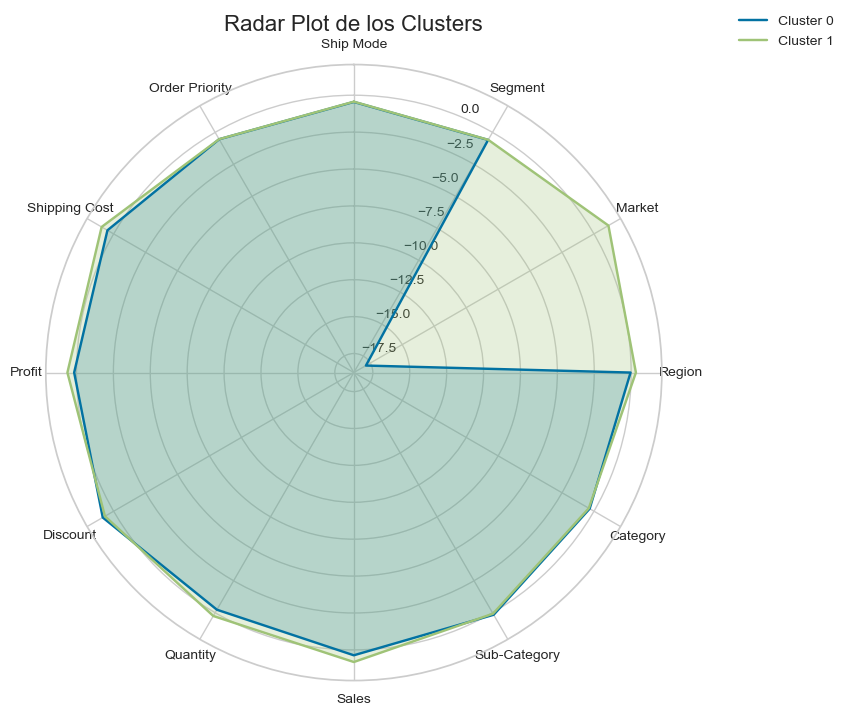

<Figure size 800x550 with 0 Axes>

In [5]:
df, labels = kmeans.modelo_kmeans(df,2,metricas=True,graficas=True)

In [6]:
kmeans_df = df.copy()
kmeans_df.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
Product ID,,,,,,,,,,,,,
OFF-BI-10001659,0.0,0.0,3.34,-0.795177,0.0,1.137103,-0.221308,0.666667,0.0,-0.075795,-0.343407,0.0,1


# Muy bueno
- Con esta separacion podemos unirlo al DF original para hacer nuestras métricas

In [7]:
df_og = pd.read_csv("../../../datos/Global_Superstore.csv",encoding="latin-1")

In [8]:
kmeans_df.reset_index(inplace=True)

In [9]:
kmeans_df.sample()

,Product ID,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
17900,TEC-HEW-10000365,0.0,0.0,-18.043333,-0.057525,-1.0,-0.461351,0.809176,-0.666667,0.0,-0.108394,0.333791,0.0,0


In [10]:
df_og.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
46423,43982,IV-2013-9630,06-07-2013,08-07-2013,First Class,LS-7230,Lycoris Saunders,Consumer,Abidjan,Lagunes,Cote d'Ivoire,NaN,Africa,Africa,OFF-AVE-10000543,Office Supplies,Binders,"Avery Hole Reinforcements, Clear",3.87,1,0.0,0.36,0.99,Medium


In [11]:
kmeans_df = kmeans_df[["Product ID", "clusters_kmeans"]]

In [12]:
df = df_og.merge(kmeans_df,how="left")

In [13]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
217130,16911,ES-2013-3679516,13-06-2013,17-06-2013,Standard Class,GM-14440,Gary McGarr,Consumer,Bayeux,Lower Normandy,France,NaN,EU,Central,OFF-LA-10004132,Office Supplies,Labels,"Smead Color Coded Labels, Alphabetical",38.61,3,0.0,16.2,5.17,High,1


In [14]:
df.to_pickle("../../../datos/02_regresiones/01_datos_clusters.pkl")

# Dividir en 2 Dataframes
- Uno por cluster

In [16]:
df["clusters_kmeans"].value_counts()

clusters_kmeans
1    297246
0     78066
Name: count, dtype: int64

In [33]:
df["clusters_kmeans"] = df["clusters_kmeans"].astype(int)

In [34]:
c0 = df["clusters_kmeans"] == 0
c1 = df["clusters_kmeans"] == 1
grupo0 = df[c0]
grupo1 = df[c1]

In [37]:
grupo0["clusters_kmeans"].value_counts()

clusters_kmeans
0    78066
Name: count, dtype: int64

In [38]:
grupo1["clusters_kmeans"].value_counts()

clusters_kmeans
1    297246
Name: count, dtype: int64